## Exercise 3.5

Design low-pass IIR filter with cutoff frequency $f_c=f_1$.

Write code that directly implements in time domain filter you’ve designed.

Save filtered signals to WAVE files.

Plot the spectrograms of each signal before and after filtering.

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = 0.6
fs = 16000

sample_count = int(t * fs)
plot_samples = 300

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


In [3]:
def filter_signal(x, b, a):
    ''' filter signal using conventional difference equation:
        y[n] = sum(b[k] * x[n-k]) - sum(a[m] * y[n-m])
    '''
    N = len(x)
    y = np.zeros(N)
    
    start_pos = max(len(a), len(b))
    
    for n in range(start_pos, N):
        for k in range(len(b)):
            y[n] += b[k] * x[n - k]
        for m in range(1, len(a)):
            y[n] -= a[m] * y[n - m]
    
    return y


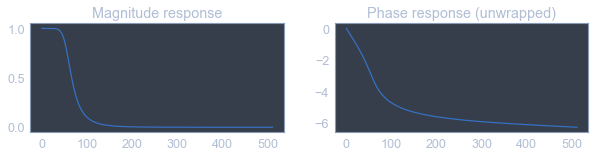

In [4]:
cutoff = 2 * freqs[0] / fs

# IIR filter design

# 1) Custom IIR filter. In this example the filter is elliptic
# b,a = sig.iirdesign(wp = [0.0, cutoff-0.01], ws=[cutoff+0.01, 0.5], gstop= 60, gpass=1, ftype='ellip')

# 2) Butterworth IIR filter

b, a = sig.butter(4, cutoff) 
w, h = sig.freqz(b, a)


plt.subplots(1, 2, figsize=(10, 2))

plt.subplot(121)
plt.title("Magnitude response")
plt.plot(np.abs(h))
plt.grid()

plt.subplot(122)
plt.title("Phase response (unwrapped)")
plt.plot(np.unwrap(np.angle(h)))
plt.grid()


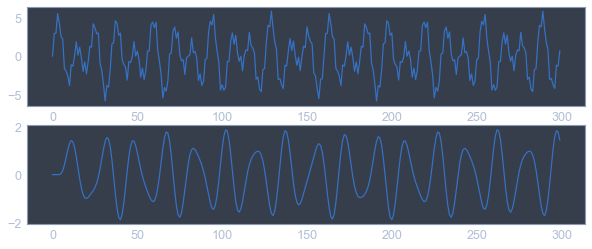

In [5]:
# filter

filtered = filter_signal(s, b, a)


plt.subplots(2, 1, figsize=(10, 4))

plt.subplot(211)
plt.plot(s[:plot_samples])
plt.grid()

plt.subplot(212)
plt.plot(filtered[:plot_samples])
plt.grid()


Text(0.5,0,'Time [sec]')

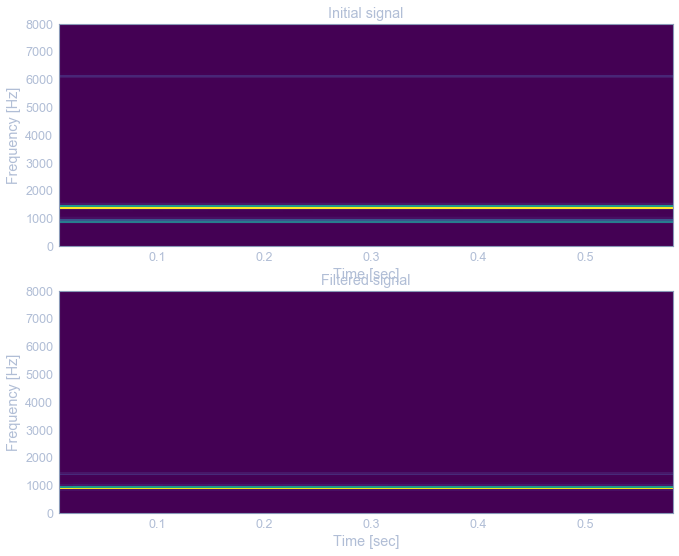

In [6]:
plt.subplots(2, 1, figsize=(11, 9))

plt.subplot(211)
plt.title("Initial signal")
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(212)
plt.title("Filtered signal")
f, t, Sxx = sig.spectrogram(filtered, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
